### Importing required libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display import display
from pylab import rcParams
from datetime import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Reading time series data 

In [4]:
LOCAL_DATA_PATH = os.path.join(os.path.abspath('./../../'), 'data/TS_data/')
LOCAL_DATA_PATH

'/Users/vidyadharbendre/nn_workspace/learn_neural_network_using_examples/data/TS_data/'

In [5]:
df = pd.read_csv(LOCAL_DATA_PATH+'AirPassenger.csv',parse_dates=True,index_col = 'Year-Month')
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Plotting time series

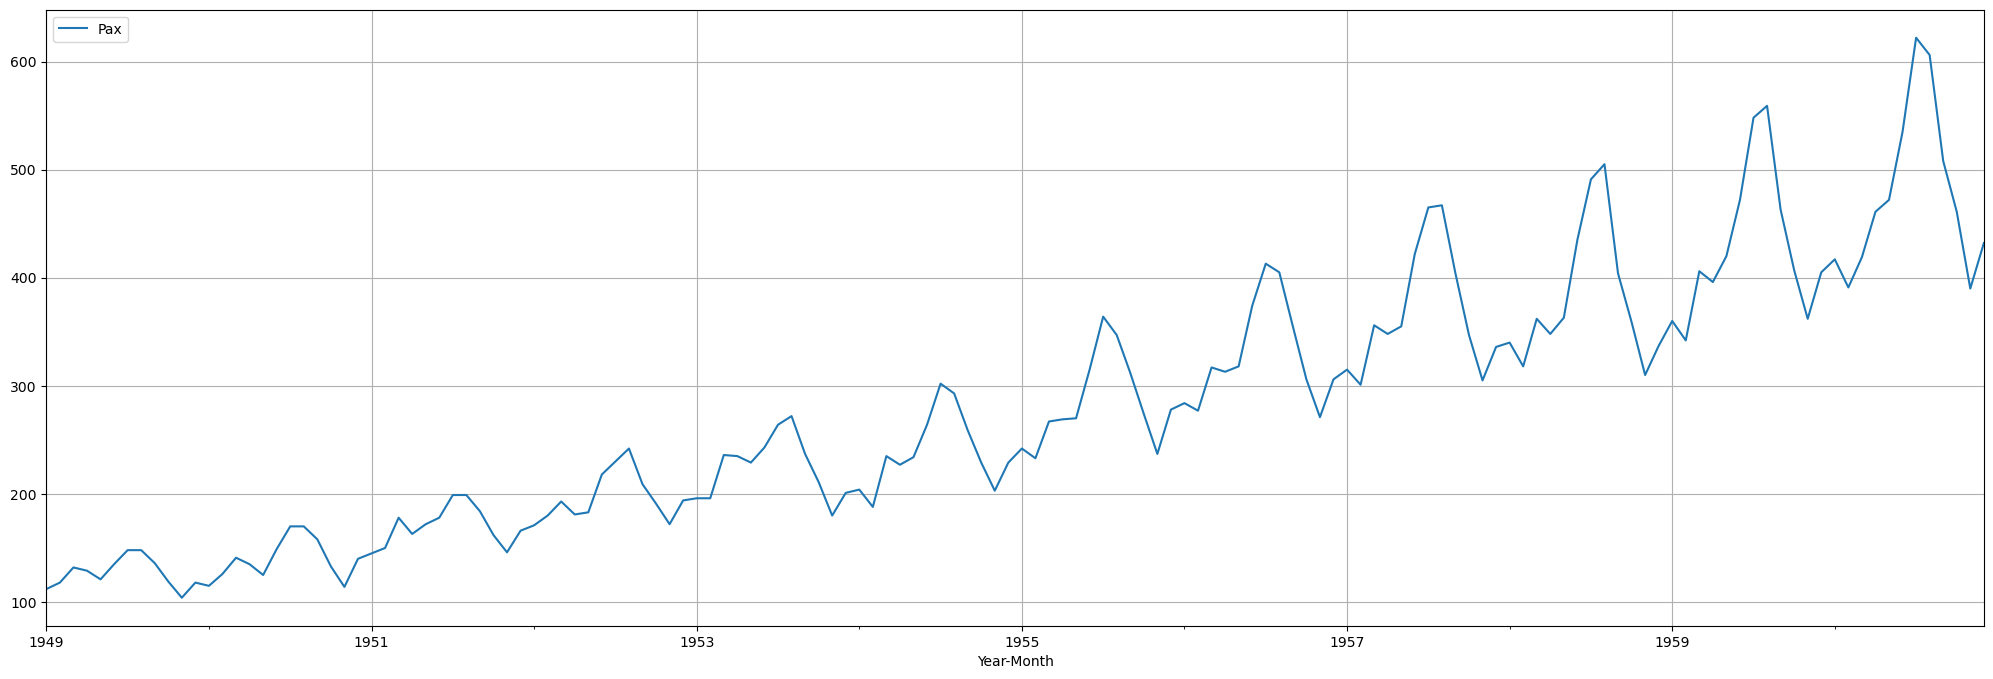

In [6]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

## Spliting time series data

### Most recent observations will be used to test the model while remaining series will be used to train the model

### if time series has seasonality, then test data must include atleast one seasonal period. 

In [7]:
train_end=datetime(1958,12,31)
test_end=datetime(1960,12,31)

In [8]:
train = df[:train_end] 
test = df[train_end + timedelta(days=1):test_end]

In [9]:
print('Train')
display(train)
print('Test')
display(test)

Train


,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-08-01,505
1958-09-01,404
1958-10-01,359


Test


,Pax
Year-Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


# Double Exponential Smoothing / Holt's linear Method

In [10]:
model_DES = Holt(train,exponential=True, initialization_method='estimated')

#### training the double exponential model

In [11]:
model_DES_fit1 = model_DES.fit(optimized=True)

In [12]:
model_DES_fit1.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,Holt,SSE,98440.166
Optimized:,True,AIC,813.165
Trend:,Multiplicative,BIC,824.315
Seasonal:,None,AICC,813.909
Seasonal Periods:,None,Date:,"Fri, 26 Apr 2024"
Box-Cox:,False,Time:,20:21:56
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9953193,alpha,True
smoothing_trend,9.3738e-05,beta,True


#### Predicting forecast

In [13]:
DES_predict1 = model_DES_fit1.forecast(steps=len(test))

#### Lets plot the forecast for SES and DES

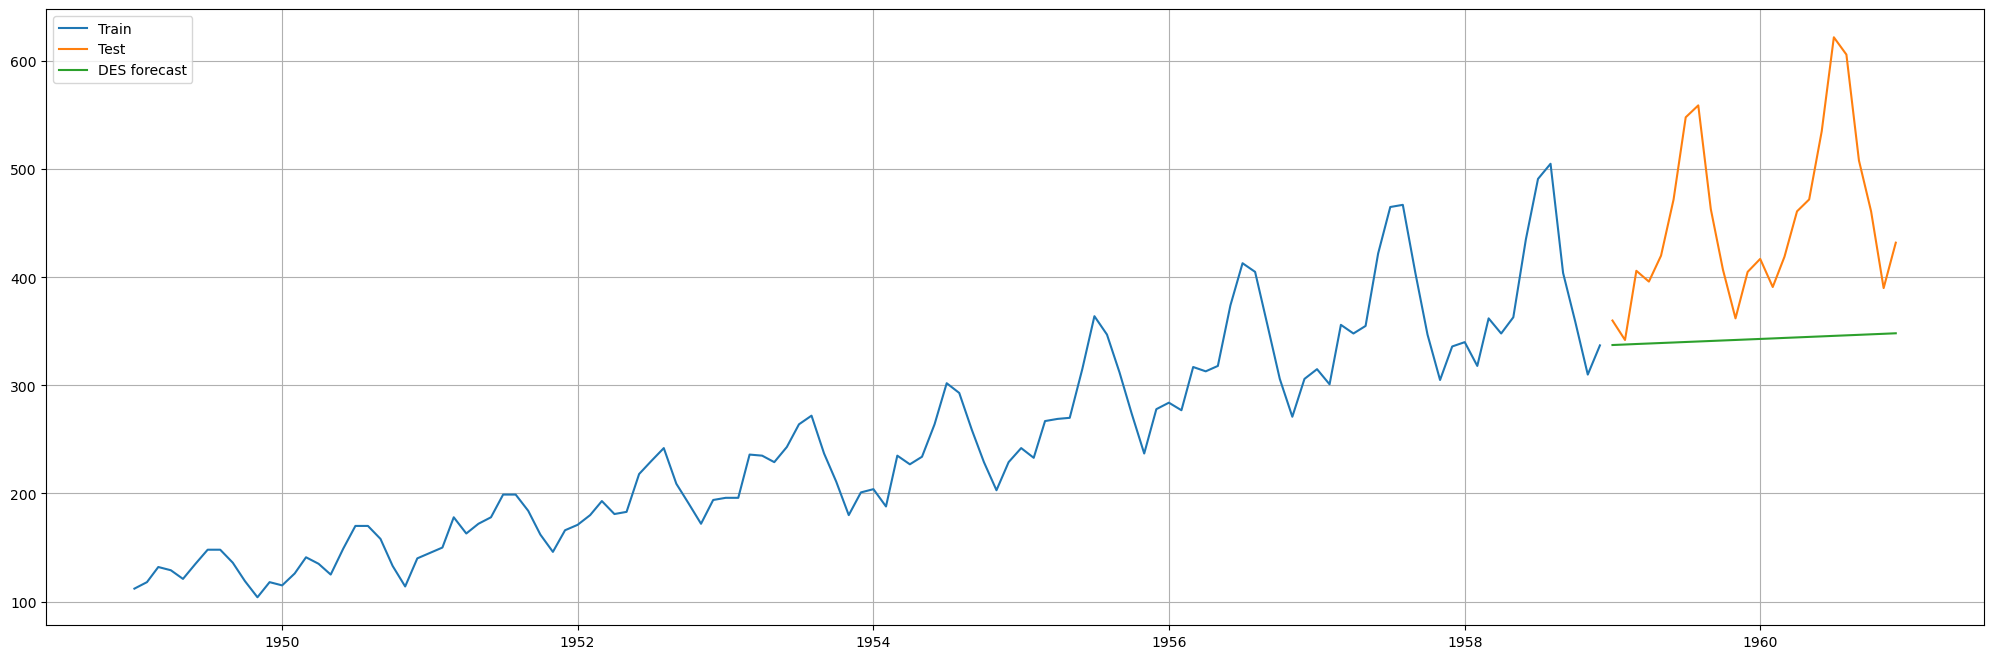

In [14]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict1, label='DES forecast')
plt.legend(loc='best')
plt.grid()

# Triple Exponential Smoothing / Holt-Winters Method

#### lets build model using 'additive' seasonality

In [15]:
model_TES_add = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')

#### training the model

In [16]:
model_TES_add = model_TES_add.fit(optimized=True)

In [17]:
model_TES_add.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,ExponentialSmoothing,SSE,16033.599
Optimized:,True,AIC,619.394
Trend:,Additive,BIC,663.994
Seasonal:,Additive,AICC,626.166
Seasonal Periods:,12,Date:,"Fri, 26 Apr 2024"
Box-Cox:,False,Time:,20:22:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2367976,alpha,True
smoothing_trend,0.000000,beta,True


#### predicting forecast

In [18]:
TES_add_predict =  model_TES_add.forecast(len(test))

#### lets plot foecast results

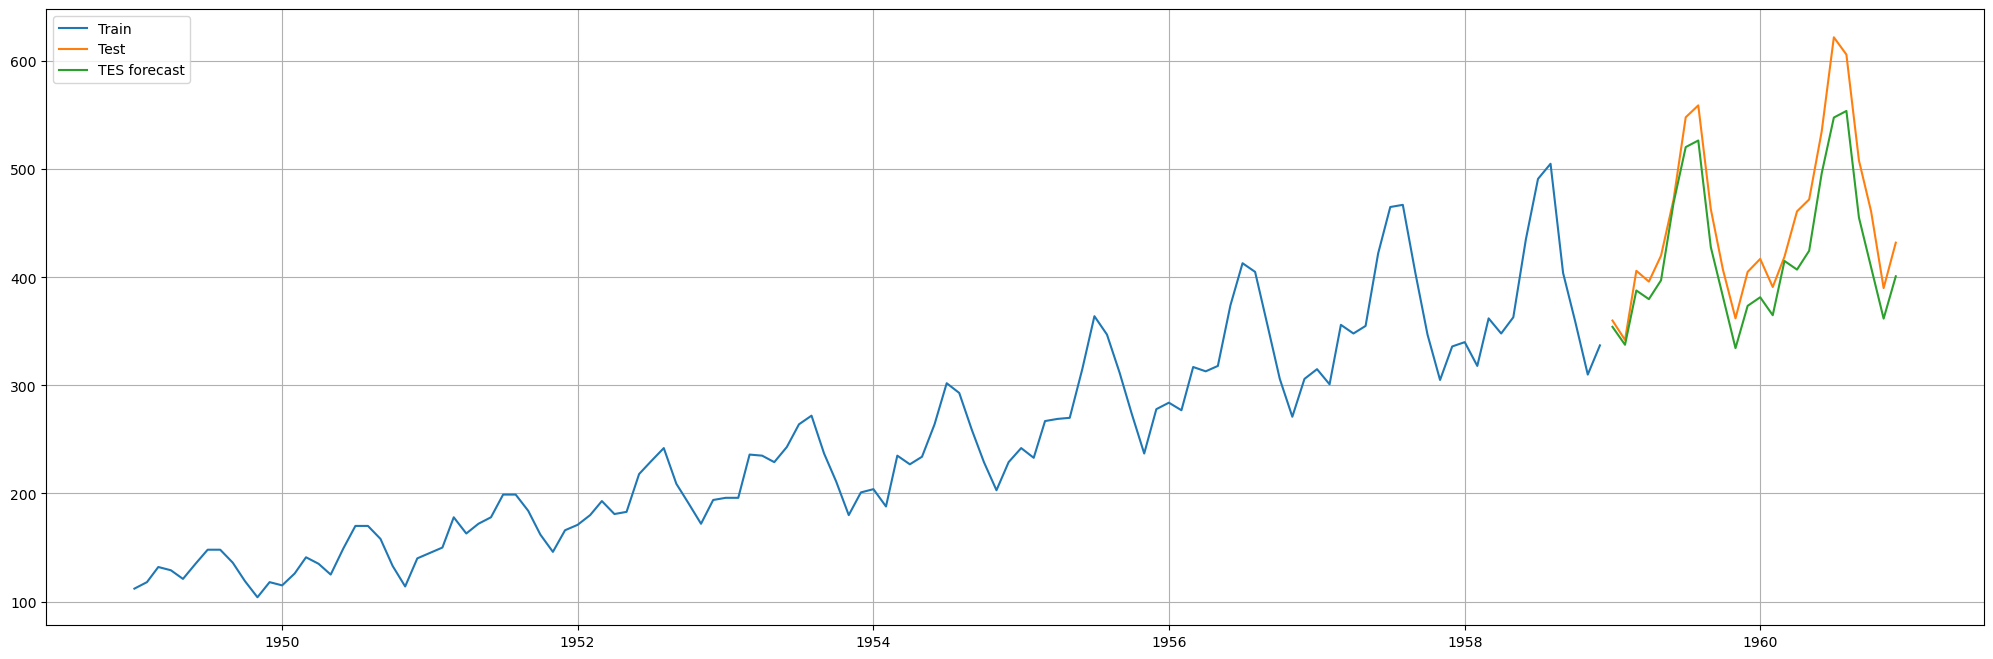

In [19]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_add_predict, label='TES forecast')
plt.legend(loc='best')
plt.grid()

### Evaluating Model Performance

In [20]:
mean_squared_error(test.values,TES_add_predict.values,squared=False)

35.75497088739542

In [21]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [22]:
MAPE(test['Pax'],TES_add_predict)

6.635435934729646

#### lets build model uaing 'multiplicative' forecast

In [23]:
model_TES_mul = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')

#### training the model

In [24]:
model_TES_mul = model_TES_mul.fit(optimized=True)

In [25]:
model_TES_mul.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,ExponentialSmoothing,SSE,10805.203
Optimized:,True,AIC,572.035
Trend:,Multiplicative,BIC,616.635
Seasonal:,Multiplicative,AICC,578.807
Seasonal Periods:,12,Date:,"Fri, 26 Apr 2024"
Box-Cox:,False,Time:,20:22:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3796501,alpha,True
smoothing_trend,0.000000,beta,True


#### predicting forecast

In [26]:
TES_mul_predict =  model_TES_mul.forecast(len(test))

#### lets plot foecast results for  H-W model with multiplicative seasonality

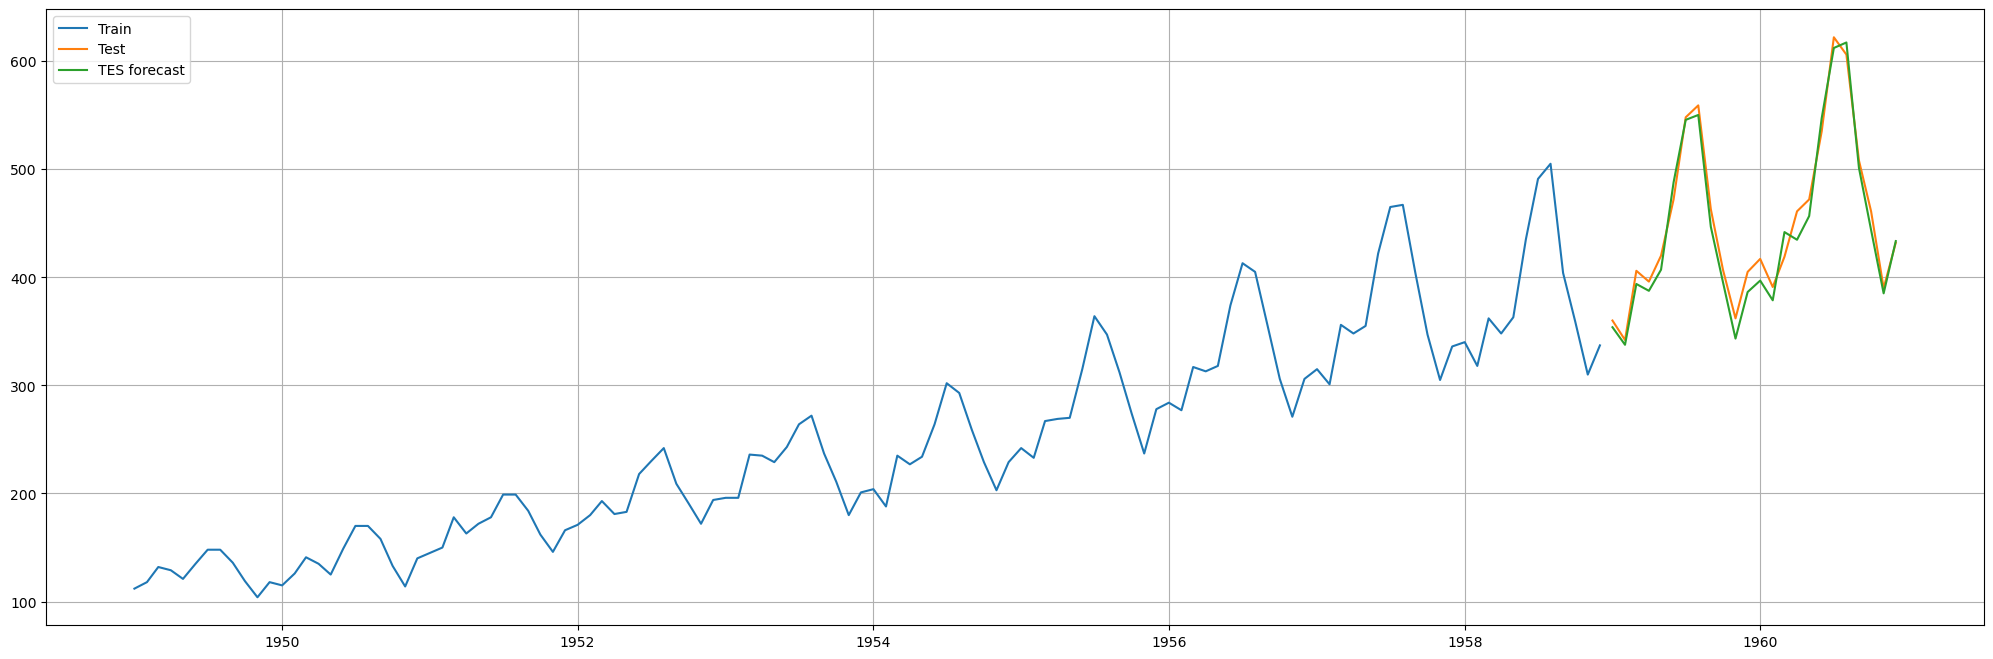

In [27]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_mul_predict, label='TES forecast')
plt.legend(loc='best')
plt.grid()

## Evaluating Model Performance

In [28]:
mean_squared_error(test.values,TES_mul_predict.values,squared=False)

13.87855052314126

#### Defining Mean Absolute Percentage error

In [29]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

#### Mean Absolute Percentage Error for simple forecasting model

In [30]:
MAPE(test['Pax'],TES_mul_predict)

2.8131706472905025

## forecasting

In [31]:
model_TES_mul = ExponentialSmoothing(df,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')

In [32]:
model_TES_mul = model_TES_mul.fit(optimized=True)

In [33]:
model_TES_mul.summary()

Dep. Variable:,Pax,No. Observations:,144
Model:,ExponentialSmoothing,SSE,15805.297
Optimized:,True,AIC,708.553
Trend:,Multiplicative,BIC,756.070
Seasonal:,Multiplicative,AICC,714.025
Seasonal Periods:,12,Date:,"Fri, 26 Apr 2024"
Box-Cox:,False,Time:,20:22:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2918941,alpha,True
smoothing_trend,3.4273e-10,beta,True


In [34]:
TES_mul_predict =  model_TES_mul.forecast(12)

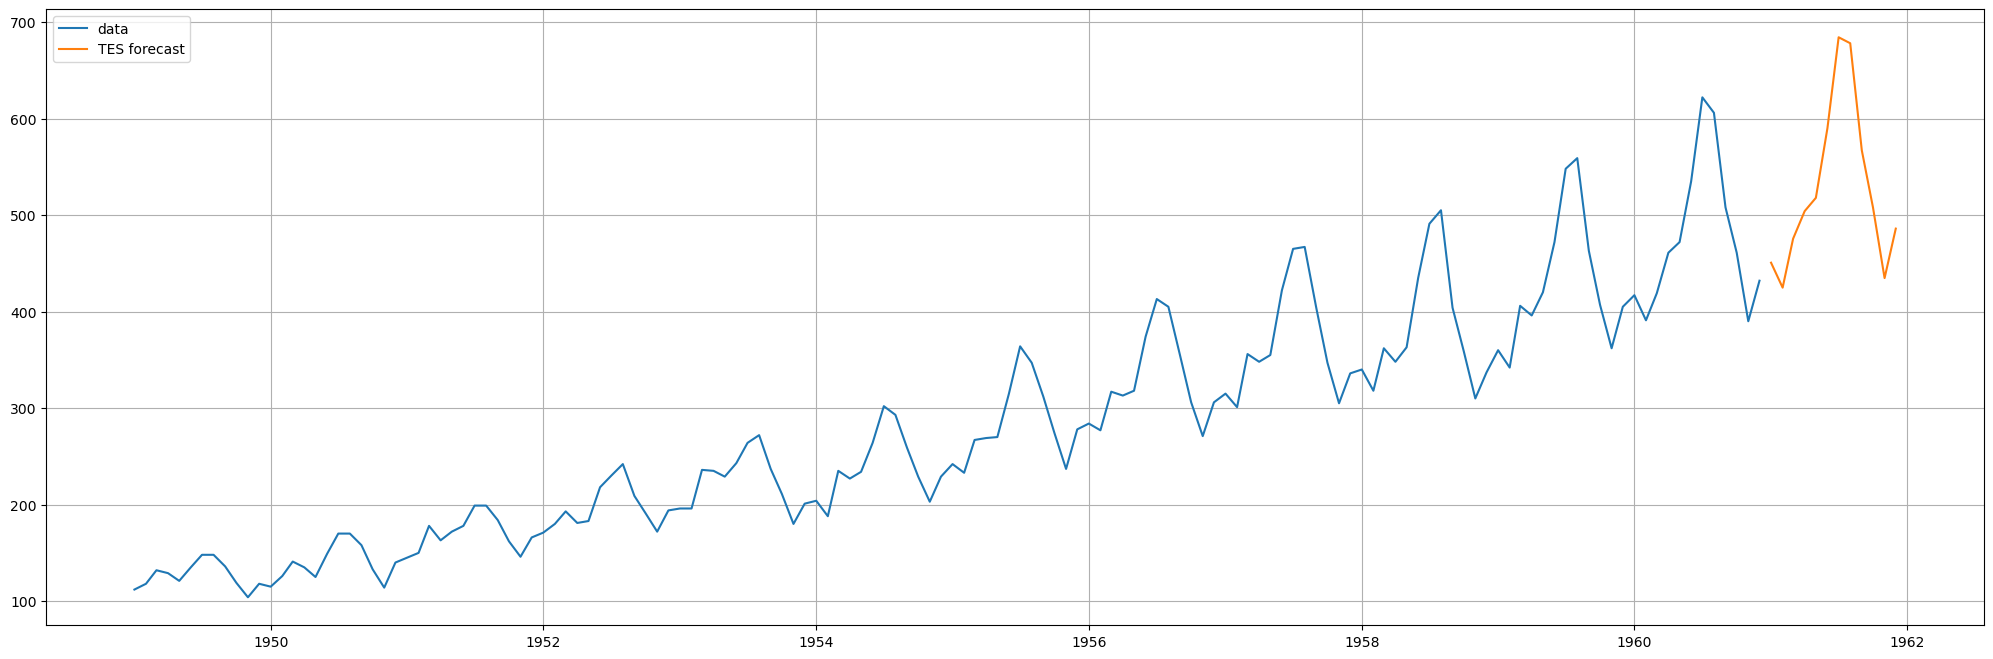

In [35]:
plt.plot(df, label='data')
plt.plot(TES_mul_predict, label='TES forecast')
plt.legend(loc='best')
plt.grid()

# END